In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Cleaning & Transformation

In [5]:
matches.drop(['umpire3'], axis = 1, inplace = True)

In [6]:
delivery.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [7]:
delivery.fillna(0, inplace = True)

In [8]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [9]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

### Basic Analysis

In [16]:
print("Total Matches Played:", matches.shape[0])

print("\nVenues Played At: ", matches['city'].unique())

print("\nTeams:", matches['team1'].unique())

Total Matches Played: 636

Venues Played At:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]

Teams: ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


1. Total Venues playes?

2. Total Umpires for the match?

3. who has the most Man of the Match?

In [19]:
print("\nNumber of venues played at: ", matches['city'].nunique())

print("\nTotal Umpires", matches['umpire1'].nunique())


Number of venues played at:  30

Total Umpires 44


In [27]:
matches['umpire1'].nunique()

44

In [20]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [23]:
print(matches['player_of_match'].value_counts().idxmax(), ": has the most man of the matches")

CH Gayle : has the most man of the matches


In [25]:
print(matches['winner'].value_counts().idxmax(), ":has the most wins")

MI :has the most wins


In [28]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [32]:
df = matches.iloc[matches['win_by_runs'].idxmax()]

df[['season', 'team1', 'team2', 'winner', 'win_by_runs']]

season         2017
team1            MI
team2            DD
winner           MI
win_by_runs     146
Name: 43, dtype: object

In [33]:
df = matches.iloc[matches['win_by_wickets'].idxmax()]

df[['season', 'team1', 'team2', 'winner', 'win_by_wickets']]

season            2017
team1               GL
team2              KKR
winner             KKR
win_by_wickets      10
Name: 2, dtype: object

### Toss Decisions

In [36]:
round(matches['toss_decision'].value_counts(normalize = True) * 100, 2)

toss_decision
field    57.08
bat      42.92
Name: proportion, dtype: float64

### Toss Decisions across Seasons

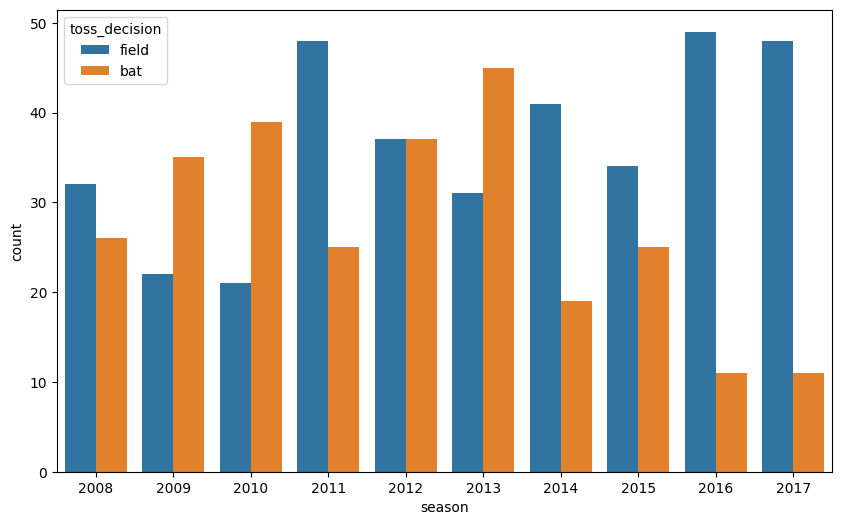

In [42]:
plt.subplots(figsize = (10, 6))

sns.countplot(x = 'season', hue = 'toss_decision', data = matches)

plt.show()

### Max Toss Winners

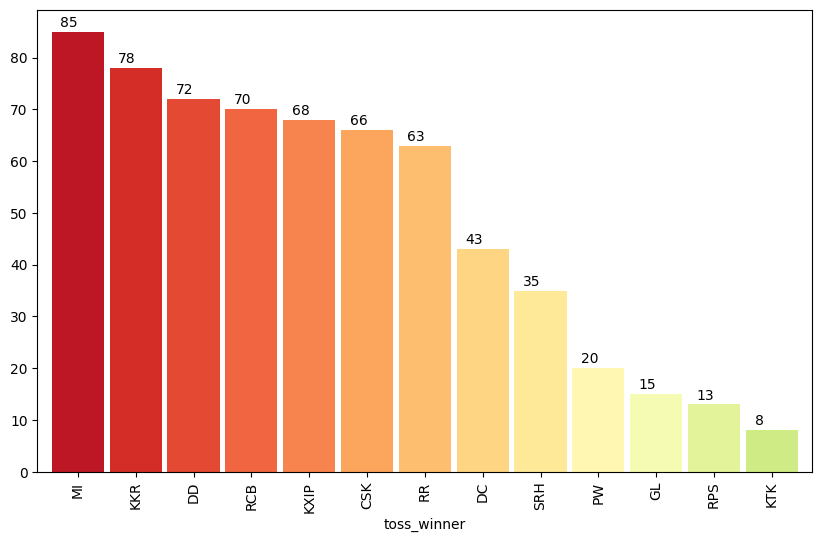

In [51]:
plt.figure(figsize = (10, 6))

ax = matches['toss_winner'].value_counts().plot.bar(width = 0.9, color = sns.color_palette('RdYlGn', 20))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 1))

plt.show()

#### Total Matches vs Wins for Teams

In [65]:
import plotly.offline as py
py.init_notebook_mode(connected = True)

In [72]:
matches_played_byteams

,Team,Total Matches
0,MI,157
1,RCB,152
2,KKR,148
3,KXIP,148
4,DD,147
5,CSK,131
6,RR,118
7,SRH,76
8,DC,75
9,PW,46


In [75]:
wins

,Team,Wins
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,RPS,15


In [74]:
matches_played_byteams = pd.concat([matches['team1'], matches['team2']])

matches_played_byteams = matches_played_byteams.value_counts().reset_index()

matches_played_byteams.columns = ['Team', 'Total Matches']

wins = matches['winner'].value_counts().reset_index()
wins.columns = ['Team', 'Wins']


matches_played_byteams = matches_played_byteams.merge(wins, on = 'Team', how = 'left')
matches_played_byteams['Wins'].fillna(0, inplace = True)

matches_played_byteams.set_index('Team', inplace = True)

trace1 = go.Bar(
    x = matches_played_byteams.index,
    y = matches_played_byteams['Total Matches'],
    name = 'Total Matches'
    )

trace2 = go.Bar(
x = matches_played_byteams.index,
y = matches_played_byteams['Wins'],
name = 'Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
barmode = 'stack'
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig, filename = 'stacked-bar')

#### Is Toss Winner also the match winner

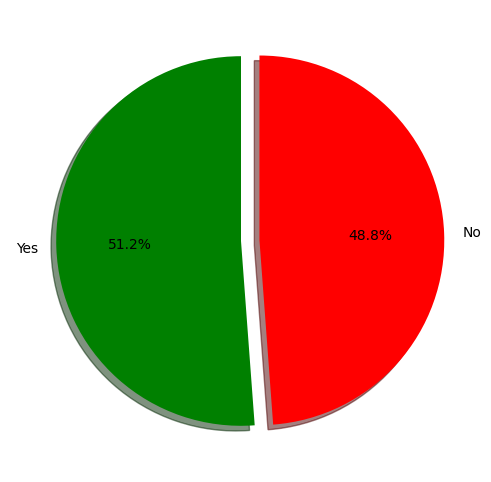

In [79]:
df = matches[matches['toss_winner'] == matches['winner']]

slices = [len(df), (635 - len(df))]

labels = ['Yes', 'No']

plt.pie(slices,
       labels = labels,
       startangle = 90,
       shadow = True,
       explode = (0, 0.1),
       autopct = "%1.1f%%",
       colors = ['g', 'r'])

fig = plt.gcf()

fig.set_size_inches(6, 6)

plt.show()

#### Matches played across each season

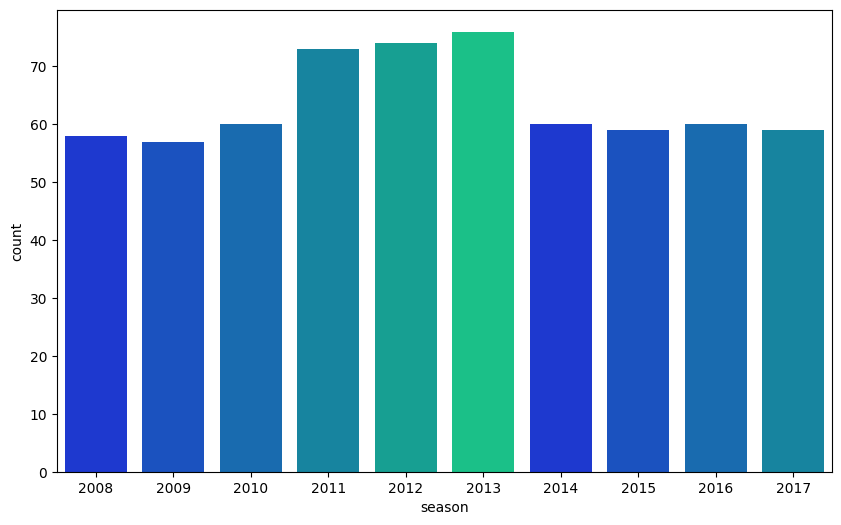

In [81]:
plt.subplots(figsize = (10, 6))

sns.countplot(x = 'season',
             data = matches,
             palette = sns.color_palette('winter'))

plt.show()

#### Runs Across the Seasons

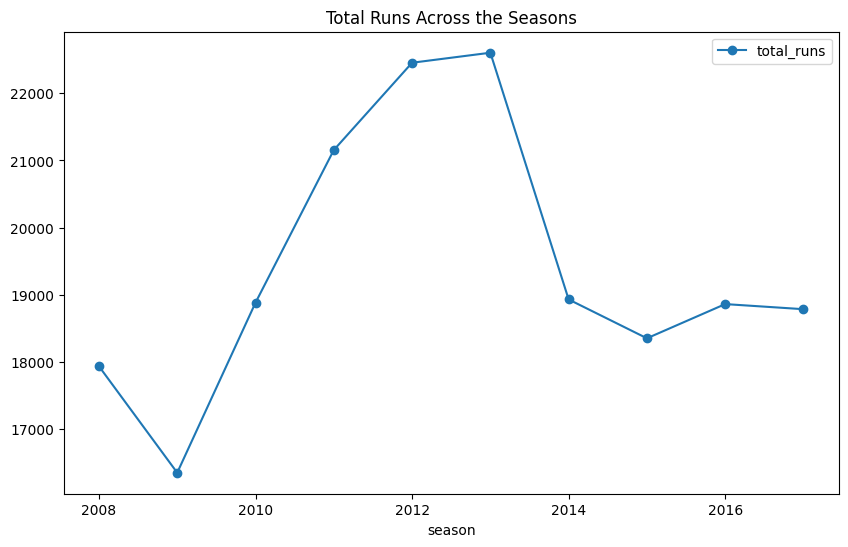

In [86]:
batsmen = matches[['id', 'season']].merge(delivery,
                               left_on = 'id',
                               right_on = 'match_id',
                               how = 'left').drop('id', axis = 1)

season = batsmen.groupby(['season'])['total_runs'].sum().reset_index()

season.set_index('season').plot(marker = 'o')

plt.gcf().set_size_inches(10, 6)

plt.title("Total Runs Across the Seasons")

plt.show()

#### Average runs per match in each season

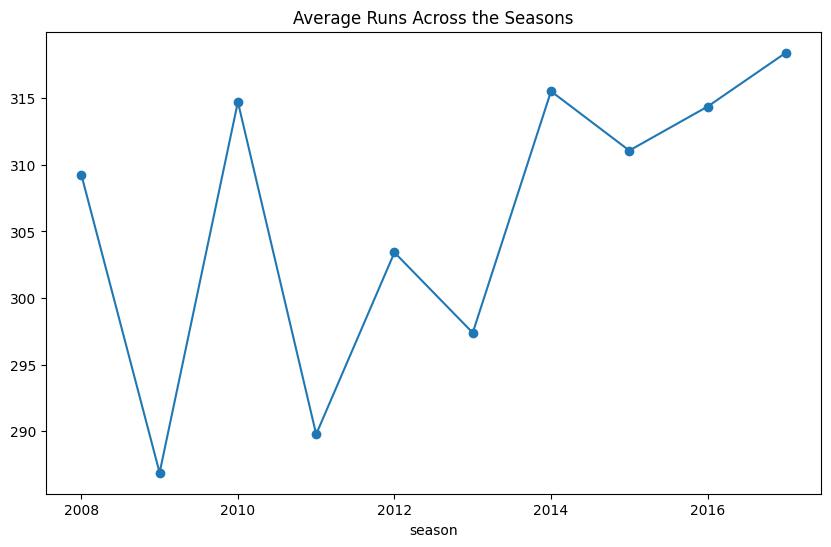

In [88]:
avgruns_each_season = matches.groupby(['season']).count().id.reset_index()

avgruns_each_season.rename(columns = {'id': 'matches'}, inplace = True)

avgruns_each_season['total_runs'] = season['total_runs']

avgruns_each_season['average_runs_per_match'] = avgruns_each_season['total_runs'] / avgruns_each_season['matches']

avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker = 'o')

plt.gcf().set_size_inches(10, 6)

plt.title("Average Runs Across the Seasons")

plt.show()

#### Sixes and Fours Across the Season

In [ ]:
What was the batsmen_runs for a season?
<Do a groupby season with batsmen_run>

In [89]:
batsmen = matches[['id', 'season']].merge(delivery,
                               left_on = 'id',
                               right_on = 'match_id',
                               how = 'left').drop('id', axis = 1)

In [91]:
sixes_boundaries

,season,batsman_runs_x,batsman_runs_y
0,2008,623,1703
1,2009,508,1321
2,2010,587,1709
3,2011,639,1916
4,2012,733,1911
5,2013,681,2054
6,2014,715,1563
7,2015,692,1611
8,2016,639,1633
9,2017,706,1612


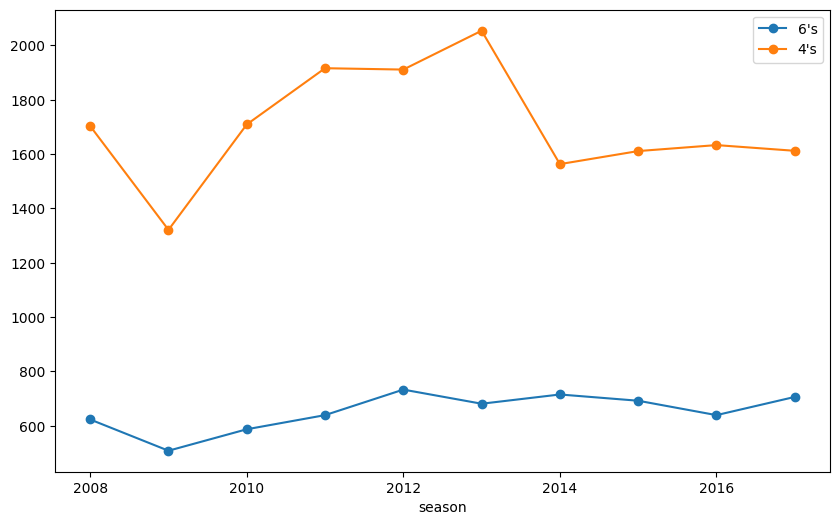

In [92]:
sixes_boundaries = batsmen.groupby("season")['batsman_runs'].agg(lambda x: (x == 6).sum()).reset_index()

a = batsmen.groupby("season")['batsman_runs'].agg(lambda x: (x ==4).sum()).reset_index()

sixes_boundaries = sixes_boundaries.merge(a, left_on = 'season', right_on = 'season', how = 'left')

sixes_boundaries = sixes_boundaries.rename(columns = {'batsman_runs_x': "6's", 'batsman_runs_y': "4's"})

sixes_boundaries.set_index('season')[["6's", "4's"]].plot(marker = 'o')

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

#### Runs Per Over By Teams Across Seasons

### Favorite Grounds

#### Maximum Man of Matches

#### Winner by Year

#### Super Over

#### Favorite Umpires:

### Team1 vs Team2

### MI vs KKR

#### Matches Won By a Team Against Other Teams

### Score Distribution For Teams by Innings

#### 200+ Scores